Optimization Project-I (non-finance)

Soumya Agrawal (SA55638)

Tanvi Dalal (TRD878)

Bruce Kim (BSK674)

Neel Sheth (nds967)

In [1]:
#importing libraries
#!python -m pip install gurobipy
import pandas as pd
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt

In [2]:
#upload files from local drive

# from google.colab import files
# uploaded = files.upload()

In [3]:
#reading all the csv files
roi_mat=pd.read_csv('roi_mat.csv', index_col=0)/100
roi_data=pd.read_csv('ROI_data.csv')
roi_data.set_index('Platform', inplace = True)

In [4]:
roi_data


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [5]:
roi_mat

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,0.040,0.036,0.024,0.039,0.030,0.035,0.036,0.0225,0.035,0.035
February,0.040,0.039,0.027,0.038,0.043,0.032,0.027,0.0180,0.037,0.035
March,0.035,0.029,0.031,0.038,0.024,0.041,0.037,0.0260,0.042,0.025
April,0.038,0.031,0.024,0.044,0.024,0.038,0.037,0.0250,0.036,0.029
May,0.035,0.032,0.019,0.034,0.027,0.027,0.039,0.0220,0.045,0.039
June,0.040,0.032,0.027,0.034,0.034,0.030,0.045,0.0210,0.038,0.041
July,0.039,0.036,0.020,0.044,0.039,0.037,0.043,0.0180,0.040,0.038
August,0.042,0.033,0.028,0.042,0.020,0.037,0.036,0.0150,0.044,0.043
September,0.041,0.028,0.025,0.042,0.029,0.037,0.028,0.0250,0.040,0.034
October,0.030,0.030,0.031,0.046,0.031,0.033,0.032,0.0230,0.025,0.032


## 3rd Question

Formulate the marketing budget allocation problem as a linear program. Use gurobi to find the
optimal budget allocation.

In [6]:
#creating the objective function for the first consulting firm
obj = np.array(roi_data.loc['ROI'].tolist())

In [7]:
#constraint matrix
A = np.zeros((13,10))
A[0,:] = [0,0,-2,-2,1,1,1,1,1,0]    #Total budget for Social media should be atleast twice of the budget for SEO and adword 
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    #Budget for print and TV combined should not be more than combined budget for facebook and email
A[2,:] = [1,1,1,1,1,1,1,1,1,1]      #Total budget should be less than or equal to 10 million USD
A[3:,:] = np.diag(np.ones(10))      #budget for all mediums should be less than or equal to 3 million USD
b = np.array([0,0,10000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000])
sense = np.array(['>','<','<','<','<','<','<','<','<','<','<','<','<'])

In [8]:
# gurobi
marketingModel = gp.Model() 

marketingModX = marketingModel.addMVar(10) 
marketingModCon = marketingModel.addMConstrs(A, marketingModX, sense, b) 
marketingModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 

marketingModel.Params.OutputFlag = 0 
marketingModel.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-19


In [9]:
marketingModel.x

[0.0, 3000000.0, 0.0, 1000000.0, 0.0, 0.0, 3000000.0, 0.0, 0.0, 3000000.0]

In [10]:
marketingModel.objval

456000.0

In [11]:
df = pd.DataFrame(columns = roi_data.columns.values.tolist() + ['Optimal'])
df.loc['First Consulting Firm'] = marketingModel.x + [marketingModel.objval]

In [12]:
print("The budget allocation for each medium and the optimal ROI is")
df

The budget allocation for each medium and the optimal ROI is


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Optimal
First Consulting Firm,0.0,3000000.0,0.0,1000000.0,0.0,0.0,3000000.0,0.0,0.0,3000000.0,456000.0


## 4th Question

Your boss is happy to see the promising results presented by the marketing department.
However, your boss is also very concerned because your boss recalls being somewhat
disappointed after following such recommendations in the past. To be cautious about the
decision, your team has decided to get another opinion about the ROI data and rerun the
analysis. The second consulting firm returns the estimates of the ROI data in the table below
(also in the CSV file mentioned above). You are asked to compare the two optimal allocations
from these two ROI estimates.

In [13]:
#creating the objective function for the second consulting firm
obj = np.array(roi_data.loc['Second Firms ROI Estimate'].tolist())

In [14]:
#constraint matrix
A = np.zeros((13,10))
A[0,:] = [0,0,-2,-2,1,1,1,1,1,0]    #Total budget for Social media should be atleast twice of the budget for SEO and adword 
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    #Budget for print and TV combined should not be more than combined budget for facebook and email
A[2,:] = [1,1,1,1,1,1,1,1,1,1]      #Total budget should be less than or equal to 10 million USD
A[3:,:] = np.diag(np.ones(10))      #budget for all mediums should be less than or equal to 3 million USD
b = np.array([0,0,10000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000])
sense = np.array(['>','<','<','<','<','<','<','<','<','<','<','<','<'])

In [15]:
# gurobi
marketingModel = gp.Model() 

marketingModX = marketingModel.addMVar(10) 
marketingModCon = marketingModel.addMConstrs(A, marketingModX, sense, b) 
marketingModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 

marketingModel.Params.OutputFlag = 0 
marketingModel.optimize()

In [16]:
marketingModel.x

[3000000.0, 0.0, 0.0, 1000000.0, 3000000.0, 3000000.0, 0.0, 0.0, 0.0, 0.0]

In [17]:
marketingModel.objval

456000.0

In [18]:
df.loc['Second Consulting Firm'] = marketingModel.x + [marketingModel.objval]

In [19]:
print("The budget allocation for each medium and the optimal ROI as per the first consulting firm and second consulting firm is")
df

The budget allocation for each medium and the optimal ROI as per the first consulting firm and second consulting firm is


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Optimal
First Consulting Firm,0.0,3000000.0,0.0,1000000.0,0.0,0.0,3000000.0,0.0,0.0,3000000.0,456000.0
Second Consulting Firm,3000000.0,0.0,0.0,1000000.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,456000.0


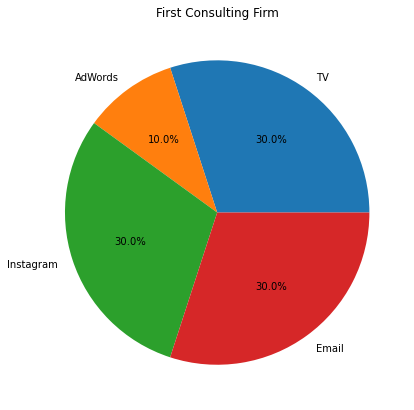

In [20]:
dic = dict()
for j in range(len(df.columns)-1):
    if df.iloc[0,j] != 0:
        dic[df.columns[j]] = df.iloc[0,j]

fig = plt.figure(figsize =(10, 7))
plt.pie(dic.values(), labels = dic.keys(), autopct='%.1f%%')
plt.title(df.index[0])

plt.show()

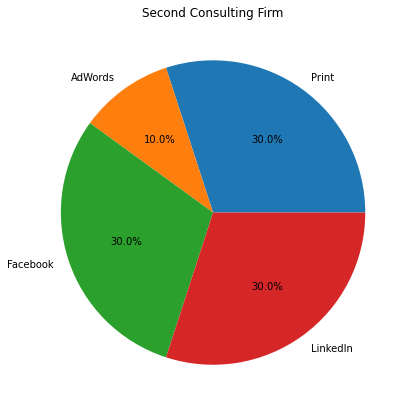

In [21]:
dic = dict()
for j in range(len(df.columns)-1):
    if df.iloc[1,j] != 0:
        dic[df.columns[j]] = df.iloc[1,j]

fig = plt.figure(figsize =(10, 7))
plt.pie(dic.values(), labels = dic.keys(), autopct='%.1f%%')
plt.title(df.index[1])

plt.show()

## 5th Question

Are the allocations the same? Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)? Assuming the second ROI data is correct, if you used the first
allocation how much lower would the objective be relative to the optimal objective? Do you think the third constraint above, based on your boss’ experience, is useful?

In [22]:
CASE_1= df.loc['First Consulting Firm','Optimal'] - np.array(roi_data.loc['ROI'].tolist()) @ np.array(df.iloc[1,:-1].tolist())
print("Assuming the first ROI data is correct, if we were to use the second allocation, the objective relative to the optimal objective would lower by: " + str(CASE_1))

Assuming the first ROI data is correct, if we were to use the second allocation, the objective relative to the optimal objective would lower by: 204000.0


In [23]:
CASE_2= df.loc['Second Consulting Firm','Optimal'] - np.array(roi_data.loc['Second Firms ROI Estimate'].tolist()) @ np.array(df.iloc[0,:-1].tolist())
print("Assuming the second ROI data is correct, if we were to use the first allocation, the objective relative to the optimal objective would lower by: " + str(CASE_2))

Assuming the second ROI data is correct, if we were to use the first allocation, the objective relative to the optimal objective would lower by: 192000.0


In [24]:
#creating the objective function for the first consulting firm
obj = np.array(roi_data.loc['ROI'].tolist())

In [25]:
#constraint matrix - removing the third constraint
A = np.zeros((3,10))
A[0,:] = [0,0,-2,-2,1,1,1,1,1,0]    #Total budget for Social media should be atleast twice of the budget for SEO and adword 
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    #Budget for print and TV combined should not be more than combined budget for facebook and email
A[2,:] = [1,1,1,1,1,1,1,1,1,1]      #Total budget should be less than or equal to 10 million USD
b = np.array([0,0,10000000])
sense = np.array(['>','<','<'])

In [26]:
# gurobi
marketingModel = gp.Model() 

marketingModX = marketingModel.addMVar(10) 
marketingModCon = marketingModel.addMConstrs(A, marketingModX, sense, b) 
marketingModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 

marketingModel.Params.OutputFlag = 0 
marketingModel.optimize()

In [27]:
marketingModel.x

[0.0, 5000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5000000.0]

In [28]:
marketingModel.objval

465000.0

In [29]:
df1 = pd.DataFrame(columns = roi_data.columns.values.tolist() + ['Optimal'])
df1.loc['First Consulting Firm'] = marketingModel.x + [marketingModel.objval]

In [30]:
#creating the objective function for the second consulting firm
obj = np.array(roi_data.loc['Second Firms ROI Estimate'].tolist())

In [31]:
#constraint matrix
A = np.zeros((3,10))
A[0,:] = [0,0,-2,-2,1,1,1,1,1,0]    #Total budget for Social media should be atleast twice of the budget for SEO and adword 
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    #Budget for print and TV combined should not be more than combined budget for facebook and email
A[2,:] = [1,1,1,1,1,1,1,1,1,1]      #Total budget should be less than or equal to 10 million USD
b = np.array([0,0,10000000])
sense = np.array(['>','<','<'])

In [32]:
# gurobi
marketingModel = gp.Model() 

marketingModX = marketingModel.addMVar(10) 
marketingModCon = marketingModel.addMConstrs(A, marketingModX, sense, b) 
marketingModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 

marketingModel.Params.OutputFlag = 0 
marketingModel.optimize()

In [33]:
marketingModel.x

[5000000.0, 0.0, 0.0, 0.0, 5000000.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [34]:
marketingModel.objval

465000.0

In [35]:
df1.loc['Second Consulting Firm'] = marketingModel.x + [marketingModel.objval]

In [36]:
print("The budget allocation for each medium and the optimal ROI as per the first consulting firm and second consulting firm if third constraint was ingnored is")
df1

The budget allocation for each medium and the optimal ROI as per the first consulting firm and second consulting firm if third constraint was ingnored is


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Optimal
First Consulting Firm,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,465000.0
Second Consulting Firm,5000000.0,0.0,0.0,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,465000.0


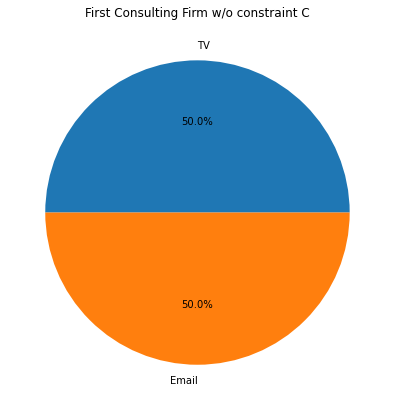

In [37]:
dic = dict()
for j in range(len(df1.columns)-1):
    if df1.iloc[0,j] != 0:
        dic[df1.columns[j]] = df1.iloc[0,j]

        
fig = plt.figure(figsize =(10, 7))
plt.pie(dic.values(), labels = dic.keys(), autopct='%.1f%%')
plt.title(df.index[0]+" w/o constraint C")

plt.show()

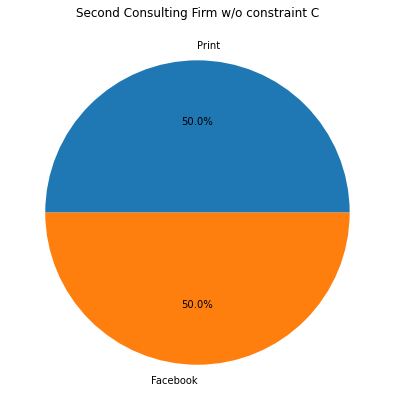

In [38]:
dic = dict()
for j in range(len(df1.columns)-1):
    if df1.iloc[1,j] != 0:
        dic[df1.columns[j]] = df1.iloc[1,j]
  
fig = plt.figure(figsize =(10, 7))
plt.pie(dic.values(), labels = dic.keys(), autopct='%.1f%%')
plt.title(df.index[1]+" w/o constraint C")

plt.show()

## 6th Question

To explore this, further perform some analysis of how your optimal allocation would change
based on changes in the ROI data. Use the first ROI data as your starting point. By how much
could each advertising medium’s ROI increase or decrease and still result in the same optimal
allocation you found in step (3)?

In [39]:
# Codes from step (3)

#creating the objective function for the first consulting firm
obj = np.array(roi_data.loc['ROI'].tolist())

#constraint matrix
A = np.zeros((13,10))
A[0,:] = [0,0,-2,-2,1,1,1,1,1,0]    #Total budget for Social media should be atleast twice of the budget for SEO and adword 
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1]    #Budget for print and TV combined should not be more than combined budget for facebook and email
A[2,:] = [1,1,1,1,1,1,1,1,1,1]      #Total budget should be less than or equal to 10 million USD
A[3:,:] = np.diag(np.ones(10))      #budget for all mediums should be less than or equal to 3 million USD
b = np.array([0,0,10000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000])
sense = np.array(['>','<','<','<','<','<','<','<','<','<','<','<','<'])

# gurobi
marketingModel = gp.Model() 
marketingModX = marketingModel.addMVar(10) 
marketingModCon = marketingModel.addMConstrs(A, marketingModX, sense, b) 
marketingModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
marketingModel.Params.OutputFlag = 0 
marketingModel.optimize()

In [40]:
df_bound = pd.DataFrame(columns = roi_data.columns.values.tolist())
df_bound.loc['Lower Bound'] = marketingModX.SAOBjLow
df_bound.loc['Upper Bound'] = marketingModX.SAOBjUp

print('Below table shows how much each advertising medium\'s ROI could increase/decrease while the optimal allocation from step (3) stays the same.')
df_bound

Below table shows how much each advertising medium's ROI could increase/decrease while the optimal allocation from step (3) stays the same.


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Lower Bound,-inf,0.039,-inf,0.033,-inf,-inf,0.039,-inf,-inf,0.029
Upper Bound,0.049,0.062,0.039,0.046,0.029,0.039,inf,0.039,0.039,inf


## 7th Question

Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% = $10.2M. The monthly ROI for next year is given in Project1.Rdata. The three constraints given by your boss are still in place for each month. What is the optimal allocation for each month?

In [41]:
roi_month = pd.read_csv('roi_mat.csv')
roi_month = roi_month.rename(columns={'Unnamed: 0':'month'})

optimal_allocation = pd.DataFrame(columns=list(roi_month.columns))

spend = 10000000

for index, row in roi_month.iterrows():
    roi_list = [row[1]/100,row[2]/100,row[3]/100,row[4]/100,row[5]/100,row[6]/100,row[7]/100,row[8]/100,row[9]/100,row[10]/100]
    obj = np.array(roi_list) # objective vector

    A = np.zeros((3,10)) # initialize constraint matrix
    A[0,:] = [1,1,1,1,1,1,1,1,1,1] # 10M
    A[1,:] = [1,1,0,0,-1,0,0,0,0,-1] # Constraint A
    A[2,:] = [0,0,-2,-2,1,1,1,1,1,0] # Constraint B

    b = np.array([spend,0,0]) 
    sense = np.array(['<','<','>']) # all constraints are less than or equal constraints

    marketingModel = gp.Model() 
    marketingModX = marketingModel.addMVar(10, ub = np.array([3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000])) 
    marketingModCon = marketingModel.addMConstrs(A, marketingModX, sense, b) 
    marketingModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
    marketingModel.Params.OutputFlag = 0 
    marketingModel.optimize()

    spend = spend + (marketingModel.objVal*0.5) # reinvest half of the return 
    
    monthly_alloc = marketingModel.x
    
    temp_dict = {}
    temp_dict[list(roi_month.columns)[0]] = row[0]
    temp_dict[list(roi_month.columns)[1]] = monthly_alloc[0]
    temp_dict[list(roi_month.columns)[2]] = monthly_alloc[1]
    temp_dict[list(roi_month.columns)[3]] = monthly_alloc[2]
    temp_dict[list(roi_month.columns)[4]] = monthly_alloc[3]
    temp_dict[list(roi_month.columns)[5]] = monthly_alloc[4]
    temp_dict[list(roi_month.columns)[6]] = monthly_alloc[5]
    temp_dict[list(roi_month.columns)[7]] = monthly_alloc[6]
    temp_dict[list(roi_month.columns)[8]] = monthly_alloc[7]
    temp_dict[list(roi_month.columns)[9]] = monthly_alloc[8]
    temp_dict[list(roi_month.columns)[10]] = monthly_alloc[9]
    
    optimal_allocation = round(optimal_allocation.append(temp_dict, ignore_index=True),2)

    
optimal_allocation

,month,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,3000000.00,0.0,0.0,1333333.33,0.00,0.00,2666666.67,0.0,0.00,3000000.00
1,February,3000000.00,0.0,0.0,2395500.00,3000000.00,0.00,0.00,0.0,1791000.00,0.00
2,March,0.00,0.0,0.0,3000000.00,0.00,3000000.00,1389648.00,0.0,3000000.00,0.00
3,April,0.00,0.0,0.0,3000000.00,0.00,3000000.00,3000000.00,0.0,1596856.49,0.00
4,May,1804099.90,0.0,0.0,0.00,0.00,0.00,3000000.00,0.0,3000000.00,3000000.00
5,June,3000000.00,0.0,0.0,0.00,0.00,0.00,3000000.00,0.0,2020171.65,3000000.00
6,July,0.00,0.0,0.0,3000000.00,2247554.91,0.00,3000000.00,0.0,3000000.00,0.00
7,August,3000000.00,0.0,0.0,1827294.08,0.00,654588.16,0.00,0.0,3000000.00,3000000.00
8,September,1362932.65,0.0,0.0,3000000.00,0.00,3000000.00,0.00,0.0,3000000.00,1362932.65
9,October,0.00,0.0,0.0,3000000.00,0.00,3000000.00,3000000.00,0.0,0.00,2955475.27


## 8th Question

A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model. Describe how my might model this?

In [42]:
# Difference between the month budget and the month before budget
optimal_allocation[['Print',	'TV',	'SEO',	'AdWords',	'Facebook',	'LinkedIn',	'Instagram',	'Snapchat',	'Twitter',	'Email']].diff()

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,0.0,0.0,1062166.67,3000000.00,0.00,-2666666.67,0.0,1791000.00,-3000000.00
2,-3000000.00,0.0,0.0,604500.00,-3000000.00,3000000.00,1389648.00,0.0,1209000.00,0.00
3,0.00,0.0,0.0,0.00,0.00,0.00,1610352.00,0.0,-1403143.51,0.00
4,1804099.90,0.0,0.0,-3000000.00,0.00,-3000000.00,0.00,0.0,1403143.51,3000000.00
5,1195900.10,0.0,0.0,0.00,0.00,0.00,0.00,0.0,-979828.35,0.00
6,-3000000.00,0.0,0.0,3000000.00,2247554.91,0.00,0.00,0.0,979828.35,-3000000.00
7,3000000.00,0.0,0.0,-1172705.92,-2247554.91,654588.16,-3000000.00,0.0,0.00,3000000.00
8,-1637067.35,0.0,0.0,1172705.92,0.00,2345411.84,0.00,0.0,0.00,-1637067.35
9,-1362932.65,0.0,0.0,0.00,0.00,0.00,3000000.00,0.0,-3000000.00,1592542.62


The allocation we found is not stable. There are multiple instances where the change from month to month is greater than 1M dollar. To change the model so that there would be a stable budget, we would have to add a variable for each month in the for loop that would contain the optimal allocation for the previous month. Then, we would have to add a constraint that checks whether or not each month of the current year's optimal allocation is within $1M dollar of the previous month's budget, using the variable we created within the loop.